
## Linear Regression model for wine quality



## Libraries


In [1]:

## !pip install mlxtend


In [2]:

import numpy as np
import torch
import pandas as pd
import sklearn 
import random 

import matplotlib.pyplot as plt


In [3]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [4]:

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split

from torch.utils.data import TensorDataset, DataLoader

from sklearn.metrics import r2_score





## Parameters 


In [5]:

## 0.001, 0.0001, 0.0003, 0.01, 0.03

batch_size    = 16
learning_rate = 0.0003
N_epochs      = 200 ## 1000

epsilon = 0.0001



## Read data 


In [6]:

path_data = 'winequality-white.csv'

WINE_raw_data_df = pd.read_csv(path_data, delimiter=";")


In [7]:

WINE_raw_data_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:

headers_list = WINE_raw_data_df.columns.values.tolist()

headers_list


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:

headers_list2 = [ 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

headers_list2 


['density', 'pH', 'sulphates', 'alcohol', 'quality']


## Data Science 

* Correlation matrix


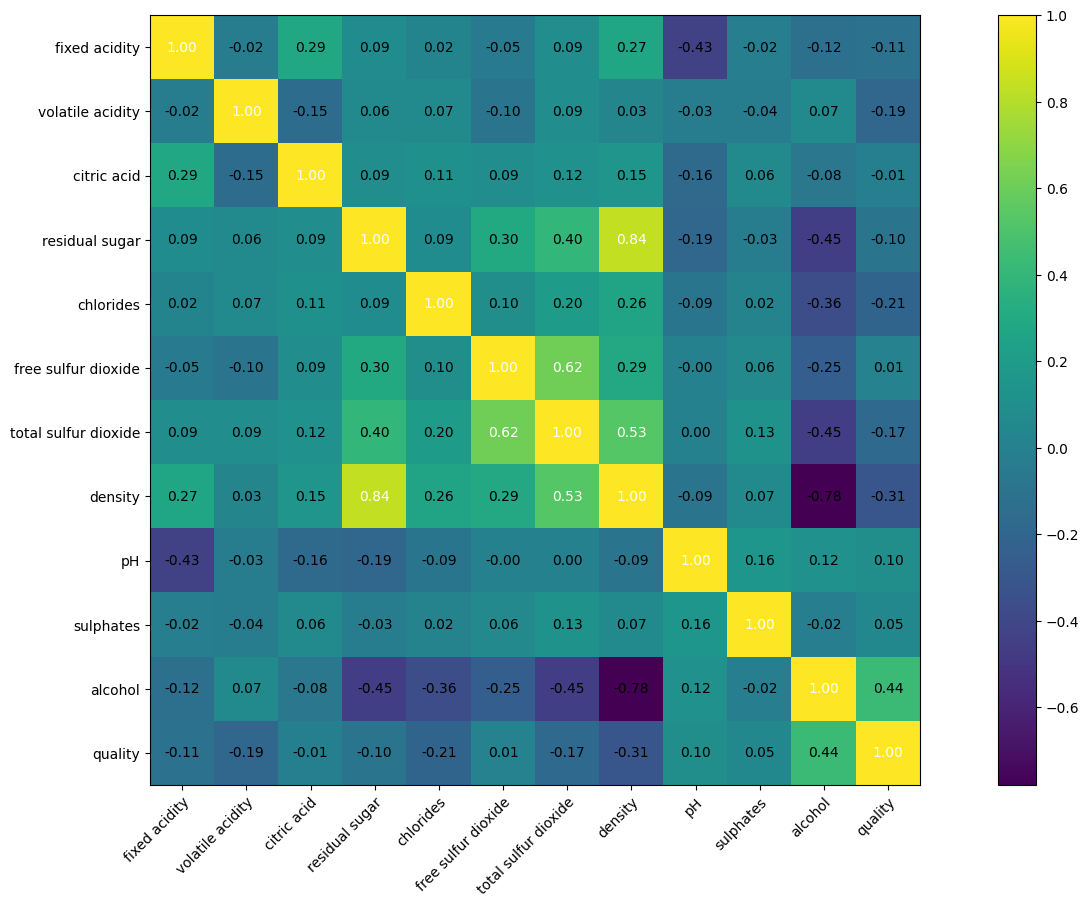

In [10]:

cm = np.corrcoef(   WINE_raw_data_df[ headers_list ].values.T  ) 
hm = heatmap(cm, row_names=headers_list, column_names=headers_list, figsize=(20,10))
#plt.show()



## Process Data


In [11]:

WINE_raw_data_np = WINE_raw_data_df.to_numpy()


In [12]:

WINE_raw_data_np


array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [13]:

WINE_raw_data_np.shape


(4898, 12)

In [14]:

X = WINE_raw_data_np[:, :-1]

y = WINE_raw_data_np[:, 11:12]


In [15]:

print( X.shape )

print( y.shape)


(4898, 11)
(4898, 1)


In [16]:

y


array([[6.],
       [6.],
       [6.],
       ...,
       [6.],
       [7.],
       [6.]])

In [17]:

random_seed=   int( random.random() * 100 )   ## 42


In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)


In [19]:

print( X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)


(3918, 11)
(980, 11)
(3918, 1)
(980, 1)


In [20]:

y_test.dtype


dtype('float64')

In [21]:

X_train = X_train.astype( np.float32  )
X_test = X_test.astype( np.float32  )
y_train = y_train.astype( np.float32  )
y_test = y_test.astype( np.float32  )


In [22]:

y_test.dtype


dtype('float32')

In [23]:

X_train_tr = torch.from_numpy(  X_train  )
X_test_tr = torch.from_numpy(  X_test  )
y_train_tr = torch.from_numpy(  y_train  )
y_test_tr = torch.from_numpy(  y_test  )



## Normalization

* Normalization
* Standardization (*)


In [24]:

x_means      = X_train_tr.mean(0, keepdim=True)

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon


In [25]:

x_means


tensor([[6.8566e+00, 2.7671e-01, 3.3420e-01, 6.3712e+00, 4.5989e-02, 3.5417e+01,
         1.3811e+02, 9.9402e-01, 3.1890e+00, 4.8992e-01, 1.0511e+01]])

In [26]:

x_deviations


tensor([[8.5174e-01, 9.9408e-02, 1.2052e-01, 5.0040e+00, 2.2860e-02, 1.7124e+01,
         4.2675e+01, 3.0325e-03, 1.5108e-01, 1.1463e-01, 1.2281e+00]])


## Create DataLoader


In [27]:

train_ds = TensorDataset( X_train_tr, y_train_tr  )


In [28]:

train_dl = DataLoader( train_ds, batch_size, shuffle=True   )



## Neural Network Architectures


In [29]:

## Linear Regression

class LinRegNet(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(11, 1)
    
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means ) / self.x_deviations
        
        y_pred = self.linear1(x)
        return y_pred


In [30]:

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(11, 7)
        self.act1    = nn.Sigmoid()         ## ReLU()
        self.linear2 = nn.Linear( 7 , 1 )
        self.dropout = nn.Dropout(0.25)
    
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means ) / self.x_deviations
        
        x = self.linear1(x)
        x = self.act1(x)
        x = self.dropout(x)
        y_pred = self.linear2(x)
        
        return y_pred


In [31]:

## Deep Learning with 2 hidden layers 

class DL_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(11, 9)
        self.act1    = nn.ReLU()         ## ReLU()
        self.linear2 = nn.Linear( 9 , 6 )
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear( 6, 1  )
        
        self.dropout = nn.Dropout(0.25)
    
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means ) / self.x_deviations
        
        x = self.linear1(x)
        x = self.act1(x)
        ## x = self.dropout(x)
        x = self.linear2(x)
        x = self.act2(x)
        y_pred = self.linear3(x)
        
        return y_pred


In [32]:



class LinearPLusNonLinear_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        ## F1
        self.f1_linear1 = nn.Linear(11, 1)
        
        ## F2
        self.f2_linear1 = nn.Linear(11, 14)
        self.f2_act1    = nn.Sigmoid()
        self.f2_linear2 = nn.Linear(14, 1)
      
    
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means ) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_linear2(f2)
        
        y_pred = f1 + f2
     
        return y_pred




## Train loop


In [33]:

def train_loop(N_epochs, model, loss_fn, opt):
    
    for epoch in range(N_epochs):
        for xb, yb in train_dl:
            
            y_pred = model(xb)
            loss = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        if epoch % 20 == 0:
            print( epoch, "loss=", loss)



## Main Loop


In [34]:


## model = LinRegNet(x_means, x_deviations)
## model = MLP_Net(x_means, x_deviations)
## model = DL_Net(x_means, x_deviations)

model = LinearPLusNonLinear_Net(x_means, x_deviations)

opt = torch.optim.Adam( model.parameters() , lr=learning_rate  )

loss_fn = F.mse_loss

train_loop(  N_epochs, model, loss_fn, opt    )


0 loss= tensor(28.6100, grad_fn=<MseLossBackward0>)
20 loss= tensor(0.3579, grad_fn=<MseLossBackward0>)
40 loss= tensor(0.6686, grad_fn=<MseLossBackward0>)
60 loss= tensor(0.6591, grad_fn=<MseLossBackward0>)
80 loss= tensor(0.4780, grad_fn=<MseLossBackward0>)
100 loss= tensor(0.3440, grad_fn=<MseLossBackward0>)
120 loss= tensor(0.1906, grad_fn=<MseLossBackward0>)
140 loss= tensor(0.6763, grad_fn=<MseLossBackward0>)
160 loss= tensor(0.9073, grad_fn=<MseLossBackward0>)
180 loss= tensor(0.3839, grad_fn=<MseLossBackward0>)



## Evaluate Model


In [37]:

y_pred_test = model( X_test_tr  )


In [38]:

y_pred_test.shape


torch.Size([980, 1])

In [39]:

print(  "Testing R**2: ", r2_score( y_test_tr.numpy(), y_pred_test.detach().numpy()  )  )


Testing R**2:  0.31527201947416983


In [40]:

list_preds = []
list_reals = []

for i in range(len(X_test_tr)):
    print("**********************************")
    print("pred, real")
    np_real =   y_test_tr[i].detach().numpy()
    np_pred = y_pred_test[i].detach().numpy()
    print( (np_pred[0], np_real[0])  )
    list_preds.append(  np_pred[0]   )
    list_reals.append(  np_real[0]   )


**********************************
pred, real
(5.7949276, 6.0)
**********************************
pred, real
(6.347283, 6.0)
**********************************
pred, real
(6.59404, 6.0)
**********************************
pred, real
(5.5880322, 5.0)
**********************************
pred, real
(6.1781435, 6.0)
**********************************
pred, real
(5.6680527, 6.0)
**********************************
pred, real
(5.482885, 5.0)
**********************************
pred, real
(6.419851, 7.0)
**********************************
pred, real
(5.224324, 6.0)
**********************************
pred, real
(7.016589, 8.0)
**********************************
pred, real
(6.061999, 6.0)
**********************************
pred, real
(5.783019, 5.0)
**********************************
pred, real
(5.242595, 5.0)
**********************************
pred, real
(6.485449, 7.0)
**********************************
pred, real
(5.5922437, 6.0)
**********************************
pred, real
(4.857913, 5.0)
****

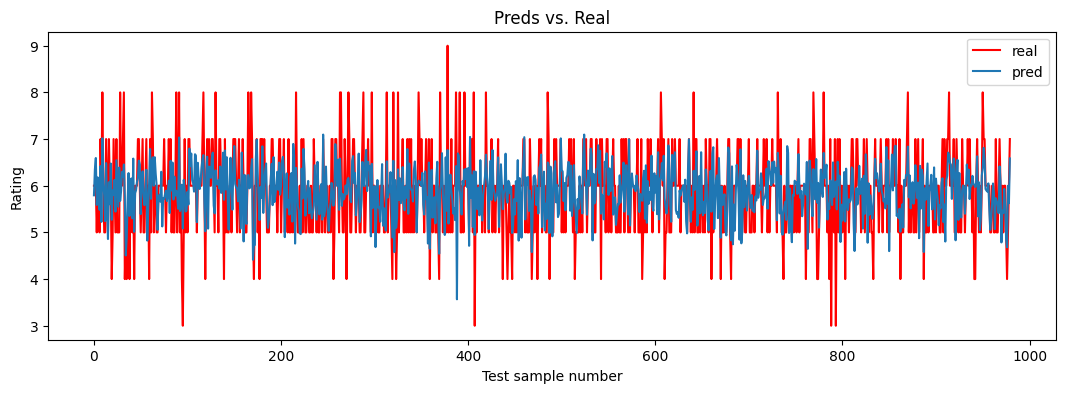

In [41]:

plt.figure(figsize=(13,4))
plt.plot(list_reals, label='real', color='r')
plt.plot(list_preds, label='pred')

plt.title("Preds vs. Real")
plt.xlabel("Test sample number")
plt.ylabel("Rating")
plt.legend()
plt.savefig("PredVsRealPlot", dpi=300)
